In [17]:
from nltk import word_tokenize, WordNetLemmatizer
from nltk.corpus import stopwords
import string

In [8]:
import requests
import re
from bs4 import BeautifulSoup
from datetime import date

In [9]:
import pandas as pd
from gensim.models import Word2Vec

In [10]:
import matplotlib.pyplot as plt
%matplotlib notebook
import numpy as np
import seaborn as sns
from sklearn.manifold import TSNE
from numpy import dot
from numpy.linalg import norm

In [11]:
from nltk.cluster import KMeansClusterer, util
from sklearn import cluster
from sklearn import metrics

In [12]:
links_csv = "~/Projects/w2v/data/links.csv"

In [13]:
df = pd.read_csv (links_csv)
df.index += 1
df.head()

,Unnamed: 0,0,title,link
1,2,"[1] M. Arvaneh, C. Guan, K. K. Ang and C. Quek...","Quek, Optimizing the Channel Selection and Cla...",https://pubmed.ncbi.nlm.nih.gov/21427014/
2,3,"[2] N. Rathipriya, S. Deepajothi and T. Rajend...","Rajendran, Classification of motor imagery eco...",https://www.semanticscholar.org/paper/Classifi...
3,4,"[3] C. Guger, A. Schlogl, C. Neuper, D. Walter...","Pfurtscheller, Rapid prototyping of an EEG-bas...",https://pubmed.ncbi.nlm.nih.gov/11482363/
4,5,"[4] Jones, Owen D. and Buckholtz, Joshua and S...","and Marois, Rene, Brain Imaging for Legal Thin...",https://papers.ssrn.com/sol3/papers.cfm?abstra...
5,6,"[5] Portnova, Galina V. and Atanov, Mikhail S....",", Age-Dependent Changes of the EEG Data: Compa...",https://ijircst.org/DOC/6_irp469.pdf


In [21]:
def remove_punct(text):
    text_nopunct = ''
    text_nopunct = re.sub('['+string.punctuation+']', '', text)
    return text_nopunct

def lower_token(tokens): 
    return [w.lower() for w in tokens]  

def remove_stop_words(tokens):
    stoplist = stopwords.words('english')
    return [word for word in tokens if word not in stoplist]

"""
To remove numbers and other silly characters these buggers use in titles
"""

def clean_sentence(val):
    "remove chars that are not letters or numbers, downcase, then remove stop words"
    regex = re.compile('([^\s\w]|_)+')
    sentence = regex.sub('', val).lower()
    "removes 2019 like strings but not 4th. As just th on its own does not make sense"
    sentence = re.sub("\d+", " ", sentence) 
    sentence = sentence.split(" ")
    sentence = " ".join(sentence)
    return sentence

def clean_dataframe(data):
    "drop nans, then apply 'clean_sentence' function to question1 and 2"
    data = data.dropna(how="any")
    
    for col in ['Text_Final']:
        data[col] = data[col].apply(clean_sentence)
    
    return data

df['Text_Clean'] = df['title'].apply(lambda x: remove_punct(x))
df['Text_Clean'] = df['title'].apply(lambda x: clean_sentence(x))
tokens = [word_tokenize(sen) for sen in df.Text_Clean]
lower_tokens = [lower_token(token) for token in tokens]
filtered_words = [remove_stop_words(sen) for sen in lower_tokens]
result = [' '.join(sen) for sen in filtered_words]
df['Text_Final'] = result
df['tokens'] = filtered_words
df.head()
combined_df= df[['title','link','Text_Final', 'tokens']]

data = clean_dataframe(combined_df)
data.head()

,title,link,Text_Final,tokens
1,"Quek, Optimizing the Channel Selection and Cla...",https://pubmed.ncbi.nlm.nih.gov/21427014/,quek optimizing channel selection classificati...,"[quek, optimizing, channel, selection, classif..."
2,"Rajendran, Classification of motor imagery eco...",https://www.semanticscholar.org/paper/Classifi...,rajendran classification motor imagery ecog si...,"[rajendran, classification, motor, imagery, ec..."
3,"Pfurtscheller, Rapid prototyping of an EEG-bas...",https://pubmed.ncbi.nlm.nih.gov/11482363/,pfurtscheller rapid prototyping eegbased brain...,"[pfurtscheller, rapid, prototyping, eegbased, ..."
4,"and Marois, Rene, Brain Imaging for Legal Thin...",https://papers.ssrn.com/sol3/papers.cfm?abstra...,marois rene brain imaging legal thinkers guide...,"[marois, rene, brain, imaging, legal, thinkers..."
5,", Age-Dependent Changes of the EEG Data: Compa...",https://ijircst.org/DOC/6_irp469.pdf,agedependent changes eeg data comparative stud...,"[agedependent, changes, eeg, data, comparative..."


In [22]:
w2v_input = []
#print (combined_df['tokens'][1])
for i in range (1,167):
    w2v_input.append(data['tokens'][i])
    

w2v_input[:2]

[['quek',
  'optimizing',
  'channel',
  'selection',
  'classification',
  'accuracy',
  'eegbased',
  'bci',
  'ieee',
  'transactions',
  'biomedical',
  'engineering'],
 ['rajendran',
  'classification',
  'motor',
  'imagery',
  'ecog',
  'signals',
  'using',
  'support',
  'vector',
  'machine',
  'brain',
  'computer',
  'interface',
  'fifth',
  'international',
  'conference',
  'advanced',
  'computing',
  'icoac']]

In [158]:

model['eeg']

/Users/user/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  """Entry point for launching an IPython kernel.


array([ 0.00049406,  0.00378726,  0.01092506, -0.00550272, -0.00642088,
        0.00752233,  0.00470546,  0.00237207,  0.00389868, -0.01146463,
        0.00979019,  0.00523614,  0.00334778, -0.00727827, -0.0138808 ,
        0.01500431, -0.00577837, -0.00237982,  0.00581652, -0.01018236,
       -0.00660543, -0.0034965 , -0.00890175,  0.00014264, -0.01084507,
       -0.00004251,  0.00735817,  0.01033577,  0.00444749, -0.01016432,
       -0.00884891, -0.00069207, -0.01415871,  0.00725722, -0.00147729,
       -0.00987694,  0.00483781, -0.00320753,  0.00724151,  0.00722258,
        0.00143325, -0.01408978,  0.0053001 , -0.00531962, -0.00526709,
        0.00894861, -0.00063938, -0.01127686, -0.00850235, -0.0025784 ],
      dtype=float32)

In [161]:
print (list(model.wv.vocab))

['quek', 'optimizing', 'channel', 'selection', 'classification', 'accuracy', 'eegbased', 'bci', 'ieee', 'transactions', 'biomedical', 'engineering', 'rajendran', 'motor', 'imagery', 'ecog', 'signals', 'using', 'support', 'vector', 'machine', 'brain', 'computer', 'interface', 'fifth', 'international', 'conference', 'advanced', 'computing', 'icoac', 'pfurtscheller', 'rapid', 'prototyping', 'braincomputer', 'neural', 'systems', 'rehabilitation', 'marois', 'rene', 'imaging', 'legal', 'thinkers', 'guide', 'perplexed', 'december', 'agedependent', 'changes', 'eeg', 'data', 'comparative', 'study', 'correlation', 'dimension', 'spectral', 'analysis', 'peak', 'alpha', 'frequency', 'stability', 'rhythms', 'may', 'rakhmatulin', 'ildar', 'progress', 'networks', 'signal', 'recognition', 'march', 'feyissa', 'anteneh', 'worrell', 'gregory', 'lagerlund', 'terrence', 'das', 'yudhajit', 'wang', 'xinlong', 'kota', 'srinivas', 'zhang', 'rong', 'liu', 'hanli', 'chalak', 'lina', 'rubinos', 'clio', 'alkhachrou

In [162]:
X = model[model.wv.vocab]


/Users/user/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  """Entry point for launching an IPython kernel.


In [165]:
NUM_CLUSTERS=7
kclusterer = KMeansClusterer(NUM_CLUSTERS, distance=nltk.cluster.util.cosine_distance, repeats=25)
assigned_clusters = kclusterer.cluster(X, assign_clusters=True)
print (assigned_clusters)

[3, 2, 1, 4, 0, 5, 1, 3, 4, 4, 1, 4, 5, 2, 6, 5, 4, 4, 3, 2, 5, 6, 1, 3, 4, 4, 4, 2, 2, 2, 2, 5, 2, 5, 5, 0, 1, 0, 6, 6, 5, 3, 4, 0, 6, 1, 0, 5, 3, 3, 5, 1, 6, 4, 1, 4, 5, 1, 3, 0, 6, 4, 2, 2, 1, 2, 3, 1, 5, 5, 5, 6, 2, 1, 0, 5, 2, 4, 0, 2, 0, 5, 0, 3, 3, 5, 1, 2, 1, 6, 0, 5, 5, 3, 6, 3, 2, 6, 4, 0, 5, 6, 1, 4, 4, 5, 5, 6, 6, 1, 1, 1, 6, 3, 5, 1, 2, 4, 6, 3, 2, 6, 1, 4, 5, 4, 3, 0, 0, 1, 2, 1, 6, 2, 5, 1, 1, 3, 0, 0, 1, 3, 2, 2, 5, 3, 6, 1, 6, 0, 4, 6, 4, 4, 5, 1, 6, 1, 1, 0, 4, 1, 2, 0, 6, 1, 6, 5, 0, 0, 1, 5, 2, 3, 6, 4, 4, 3, 6, 6, 4, 5, 2, 3, 2, 1, 3, 4, 6, 5, 0, 5, 2, 5, 6, 5, 3, 0, 3, 5, 3, 4, 4, 0, 5, 3, 6, 6, 4, 5, 3, 1, 2, 1, 2, 1, 4, 6, 4, 1, 0, 0, 4, 4, 1, 5, 0, 6, 3, 2, 1, 5, 0, 5, 0, 0, 1, 3, 2, 2, 5, 6, 2, 4, 4, 0, 6, 0, 2, 1, 0, 5, 6, 0, 6, 0, 4, 4, 3, 5, 0, 2, 4, 3, 2, 6, 2, 1, 6, 5, 0, 3, 1, 5, 5, 4, 0, 0, 1, 3, 4, 4, 3, 3, 5, 3, 6, 5, 4, 0, 6, 4, 4, 4, 5, 1, 4, 6, 1, 3, 4, 2, 1, 3, 1, 6, 3, 6, 4, 5, 1, 3, 3, 0, 2, 0, 4, 5, 2, 3, 1, 2, 1, 4, 0, 4, 3, 5, 0, 4, 6, 2, 6, 

In [166]:
words = list(model.wv.vocab)
for i, word in enumerate(words):  
    print (word + ":" + str(assigned_clusters[i]))


quek:3
optimizing:2
channel:1
selection:4
classification:0
accuracy:5
eegbased:1
bci:3
ieee:4
transactions:4
biomedical:1
engineering:4
rajendran:5
motor:2
imagery:6
ecog:5
signals:4
using:4
support:3
vector:2
machine:5
brain:6
computer:1
interface:3
fifth:4
international:4
conference:4
advanced:2
computing:2
icoac:2
pfurtscheller:2
rapid:5
prototyping:2
braincomputer:5
neural:5
systems:0
rehabilitation:1
marois:0
rene:6
imaging:6
legal:5
thinkers:3
guide:4
perplexed:0
december:6
agedependent:1
changes:0
eeg:5
data:3
comparative:3
study:5
correlation:1
dimension:6
spectral:4
analysis:1
peak:4
alpha:5
frequency:1
stability:3
rhythms:0
may:6
rakhmatulin:4
ildar:2
progress:2
networks:1
signal:2
recognition:3
march:1
feyissa:5
anteneh:5
worrell:5
gregory:6
lagerlund:2
terrence:1
das:0
yudhajit:5
wang:2
xinlong:4
kota:0
srinivas:2
zhang:0
rong:5
liu:0
hanli:3
chalak:3
lina:5
rubinos:1
clio:2
alkhachroum:1
ayham:6
dernigoghossian:0
caroline:5
claassen:5
jan:3
ddxnet:6
deep:3
learning:2
model

In [167]:
kmeans = cluster.KMeans(n_clusters=NUM_CLUSTERS)
kmeans.fit(X)
 
labels = kmeans.labels_
centroids = kmeans.cluster_centers_
 
print ("Cluster id labels for inputted data")
print (labels)
print ("Centroids data")
print (centroids)
 
print ("Score (Opposite of the value of X on the K-means objective which is Sum of distances of samples to their closest cluster center):")
print (kmeans.score(X))
 
silhouette_score = metrics.silhouette_score(X, labels, metric='euclidean')
 
print ("Silhouette_score: ")
print (silhouette_score)

Cluster id labels for inputted data
[1 5 5 4 1 5 6 6 0 0 3 1 6 1 4 2 2 0 1 4 1 0 2 3 1 0 0 0 0 2 5 6 3 2 0 2 6
 6 2 5 5 1 3 4 4 2 6 0 0 1 2 6 1 0 0 5 2 4 1 3 1 3 4 0 0 6 3 6 3 3 5 2 1 4
 3 1 1 1 6 4 6 6 6 5 3 2 6 5 2 2 3 6 6 1 4 1 0 2 5 3 2 5 6 0 3 2 5 5 1 6 3
 6 4 3 2 4 6 3 4 2 1 4 4 2 2 2 1 3 0 1 0 4 5 6 6 6 3 3 6 1 6 5 4 3 4 3 3 6
 6 3 0 1 4 1 6 4 4 4 2 4 3 5 6 4 4 3 4 6 6 4 3 3 5 1 4 5 5 1 3 4 1 1 3 0 4
 3 1 2 4 2 2 6 0 2 4 1 5 6 5 6 1 2 2 6 6 5 4 4 1 1 3 3 3 4 6 6 0 5 2 4 2 6
 0 1 3 6 6 1 5 4 4 6 1 1 6 6 6 5 2 0 1 0 6 4 4 5 4 0 4 3 5 3 1 4 5 5 4 0 1
 3 0 4 5 6 0 2 2 3 4 1 5 1 1 3 6 0 1 6 3 2 0 3 5 3 1 3 4 2 0 5 2 6 5 5 3 4
 3 5 6 0 4 2 3 3 6 4 3 2 5 5 1 6 1 2 1 6 6 2 3 3 5 5 1 5 6 0 3 6 1 1 1 2 1
 6 2 5 6 6 6 3 1 1 0 5 3 2 0 0 1 5 4 3 4 2 0 3 3 2 6 4 3 1 3 2 5 2 1 0 3 0
 6 6 6 2 5 0 3 6 1 3 6 3 3 4 6 6 2 1 2 1 4 3 5 3 5 4 1 4 1 5 5 4 0 5 2 6 3
 6 0 6 2 3 5 6 5 5 4 6 1 5 3 6 0 1 2 1 5 5 2 4 2 6 2 1 5 6 4 1 1 3 5 2 4 6
 2 2 6 1 4 3 3 0 2 1 5 4 3 5 4 0 6 2 4 4 3 3 3 3 4 4 4 6 1 3 2 3

<IPython.core.display.Javascript object>


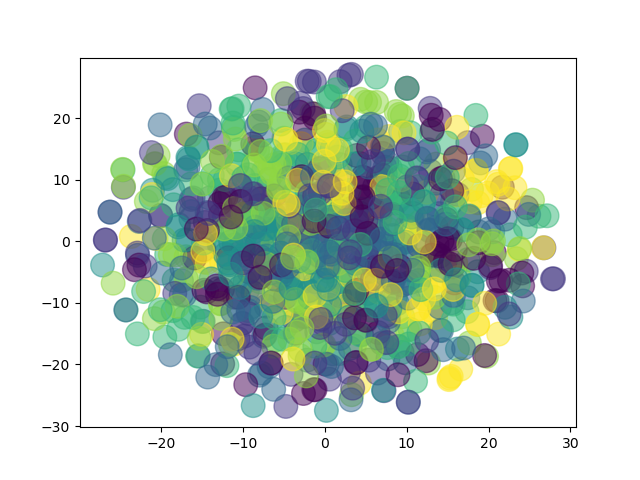

In [168]:

 
plot = TSNE(n_components=2, random_state=0)
np.set_printoptions(suppress=True)
Y=plot.fit_transform(X)


 
plt.scatter(Y[:, 0], Y[:, 1], c=assigned_clusters, s=290,alpha=.5)
plt.show() 



In [ ]:
def tsne_plot(model):
    "Creates and TSNE model and plots it"
    labels = []
    tokens = []

    for word in model.wv.vocab:
        tokens.append(model[word])
        labels.append(word)
    
    tsne_model = TSNE(perplexity=40, n_components=2, init='pca', n_iter=2500, random_state=0)
    new_values = tsne_model.fit_transform(tokens)

    x = []
    y = []
    for value in new_values:
        x.append(value[0])
        y.append(value[1])
        
    plt.figure(figsize=(16, 16)) 
    for i in range(len(x)):
        plt.scatter(x[i],y[i])
        plt.annotate(labels[i],
                     xy=(x[i], y[i]),
                     xytext=(5, 2),
                     textcoords='offset points',
                     ha='right',
                     va='bottom')
    plt.show()

In [170]:
def display_closestwords_tsnescatterplot(model, word, size):
    
    arr = np.empty((0,size), dtype='f')
    word_labels = [word]

    close_words = model.similar_by_word(word)

    arr = np.append(arr, np.array([model[word]]), axis=0)
    for wrd_score in close_words:
        wrd_vector = model[wrd_score[0]]
        word_labels.append(wrd_score[0])
        arr = np.append(arr, np.array([wrd_vector]), axis=0)
        
    tsne = TSNE(n_components=2, random_state=0)
    np.set_printoptions(suppress=True)
    Y = tsne.fit_transform(arr)

    x_coords = Y[:, 0]
    y_coords = Y[:, 1]
    plt.scatter(x_coords, y_coords)

    for label, x, y in zip(word_labels, x_coords, y_coords):
        plt.annotate(label, xy=(x, y), xytext=(0, 0), textcoords='offset points')
    plt.xlim(x_coords.min()+0.00005, x_coords.max()+0.00005)
    plt.ylim(y_coords.min()+0.00005, y_coords.max()+0.00005)
    plt.show()

/Users/user/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: DeprecationWarning: Call to deprecated `similar_by_word` (Method will be removed in 4.0.0, use self.wv.similar_by_word() instead).
  
/Users/user/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:8: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  
/Users/user/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:10: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  # Remove the CWD from sys.path while we load stuff.


<IPython.core.display.Javascript object>


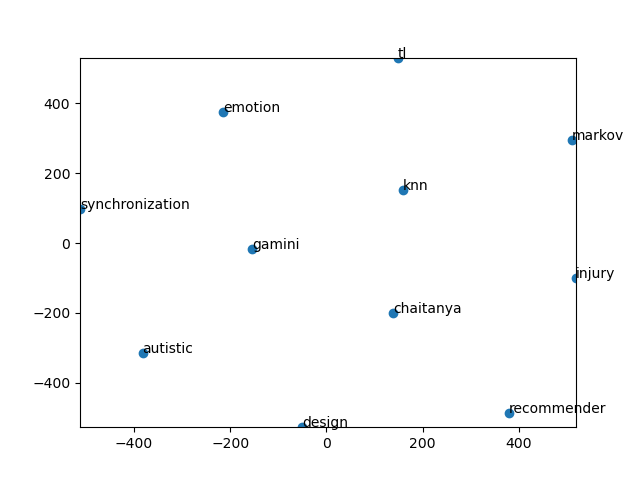

In [172]:
display_closestwords_tsnescatterplot(model, 'knn', 50)